In [7]:
import os
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
def model(bodyText,num):
    data = [[word for word in simple_preprocess(str(doc))] for doc in bodyText]
    id2word = corpora.Dictionary(data)
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in data]
    num_topics = num
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
    for idx, topic in lda_model.show_topics(formatted=False):
        return '{}'.format(' '.join([w[0] for w in topic]))

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

def topicCloud(topics,title):
    topics = ' '.join(topics)
    words = topics.split(' ')
    word_counts = Counter(words)
    print(word_counts.most_common(100))    
    word_cloud = WordCloud(background_color = "white", width=3000, height=2000, max_words=500, collocations=True).generate_from_frequencies(word_counts)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

def bar(xData,yData,title,color,xlabel,ylabel):
    plt.figure(figsize = (15, 10))
    plt.bar(xData,yData,color=color)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.xticks(fontsize=12,rotation=60)
    plt.ylabel(ylabel, fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [8]:
def remove_stopwords(text):
    stop = ['i', 'amp','me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
                "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 
                'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', 
                "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
                'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 
                'am', 'in','is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 
                'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'or', 
                'as', 'until', 'while', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 
                'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 
                'down', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 
                'there', 'when', 'whence','where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
                'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 
                'than', 'too', 'very', 's', 't', 'can', 'will', 'don', "don't", "should've", 'now', 
                'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 
                'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', 
                "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', 
                "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
                "weren't", 'won', "won't", 'wouldn', "wouldn't", 'neve', 'earlier', 'may', 
                'unto', 'whereof', 'began', 'inasmuch', 'shall', 'de', 'we', 'sir', 'later', 'until', 
                'could', 'two', 'years', 'mr', 'long', 'till', 'thereof', 'indeed', 'ie', 'himself', 
                'neither', 'doth', 'thence', 'seem', 'part', 'old', 'definite', 'would', 'iq', 
                'aforesaid', 'ever', 'might', 'upon', 'how', 'therein', 'through', 'done', 'begin', 
                'little', 'last', 'also', 'ew', 'etc', 'full', 'second', 'though', 'more', 'his', 
                'whereas', 'thy', 'thee', 'themselves', 'he', 'why', 'seldom', 'hear', 'what', 
                'think', 'matter', 'et cetera', 'present', 'do', 'before', 'made', 'there', 
                'thereforeunto', 'when', 'whilst', 'herself', 'definitely', 'her', 'arrived', 
                'per', 'afterward', 'far', 'dr', 'saying', 'char', 'whereby', 'or', 'third', 
                'seems', 'mentioned', 'go', 'esq', 'year', 'likewise', 'must', 'know', 'pag', 
                'conerning', 'earliest', 'ditto', 'hath', 'without', 'self', 'lib', 'three', 
                'and', 'itself', 'suchtwo', 'otherwise', 'seeing', 'him', 'latest', 'often', 
                'cannot', 'et', 'thou', 'est', 'it', 'which', 'can', 'most', 'let', 'almost', 
                'say', 'late', 'hereby', 'every', 'wherein', 'either', 'much', 'come', 'said', 
                'else', 'near', 'cap', 'esq', 'viz', 'heard', 'fol', 'like', 
                'within', 'have', 'thus', 'certainly', 'one', 'make', 'rather', 'she', 
                'eg', 'where', 'ne', 'since', 'four', 'fourth', 'includes', 'even', 'us', 
                'gone', 'five', 'anno', 'went', 'thing','according','hove','set',
                'ettling', 'hee', 'bee', 'wee', 'mat', 'gen','rom',
                'if','of','because','since','part','yet','whether',
                'many','day','great','qua','out','man','time',
                'first','one','two','second','well','see','call',
                'against','never','word','place','therefore',
                'way','still']

    tokens = [x for x in text.split(' ') if x not in stop]
    tokens = ' '.join(tokens)
    tokens = ' ' + tokens + ' '
    return tokens

In [9]:
latin = ['A54390','A09452','A09447','A09349']
welsh = ['A90503','A90506']
def getTexts(folder):
    texts = {}
    for file in os.listdir(folder):
        if 'NOTES' not in file: 
            name = file.split('.')[0]
            if name in latin: continue
            elif name in welsh: continue
            else:  
                path = os.path.join(folder,file)
                f = open(path,'r')
                data = f.readlines()[0]
                texts[name] = remove_stopwords(data)
                f.close()
    return texts

In [10]:
texts = getTexts('/Users/amycweng/Digital Humanities/playsTXT')
print(len(texts))

33


In [11]:
outfile = 'topicsPlays.txt'
for name,text in texts.items():
    if len(text) != 0:
        topicWords = model([text],1)
        # print(f'{name}: {str(topicWords)}\n')
        with open(outfile,'a+') as file: 
            file.write(f'{name}: {str(topicWords)}\n')

[('good', 32), ('take', 28), ('love', 22), ('gentleman', 18), ('lady', 13), ('give', 12), ('master', 11), ('lord', 9), ('wife', 8), ('madam', 8), ('god', 8), ('ha', 8), ('tell', 8), ('yes', 6), ('pray', 6), ('woman', 6), ('nay', 5), ('heart', 4), ('keep', 4), ('look', 4), ('oh', 4), ('mistress', 4), ('grace', 3), ('brother', 3), ('sweet', 3)]


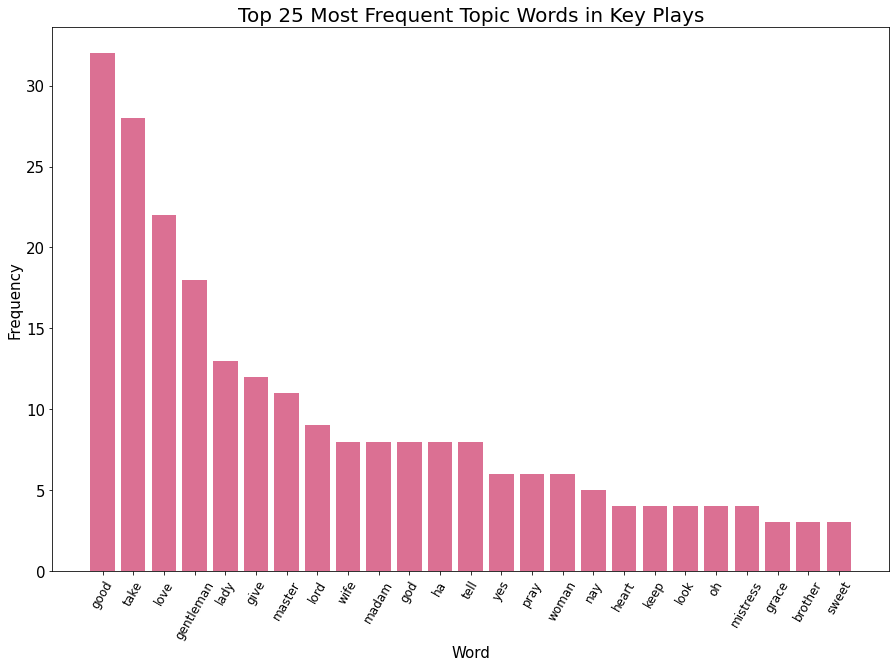

In [12]:
topics = []
readFile = open('/Users/amycweng/Digital Humanities/Early-Modern-London/topicsPlays.txt','r')
for line in readFile:
    tcpID =  line.split(':')[0]
    topic = line.split(':')[1].strip()
    topics.append(topic)
readFile.close()
bigString = ' '.join(topics)
topicWords = bigString.split(' ')
counts = Counter(topicWords)
print(counts.most_common(n=25))
tuples = counts.most_common(n=25)
x,y = [],[]
for word,freq in tuples: 
    x.append(word)
    y.append(freq)
bar(x,y,"Top 25 Most Frequent Topic Words in Key Plays",'palevioletred','Word','Frequency')